# Customer retention strategy research for the Model Fitness


Given research is investigating customer behaviour for the Model Fitness, the gym chain that is developing a customer interaction strategy based on analytical data. 

We will learn to predict the probability of churn (for the upcoming month) for each customer; draw up typical user portraits: select the most outstanding groups and describe their main features; analyze the factors that impact churn most; draw basic conclusions and develop recommendations on how to improve customer service:

    * Identify target groups
    * Suggest measures to cut churn
    * Describe any other patterns you see with respect to interaction with customers

## Table Of Content:
1. [Openning data & pre-processing](#start)
    - 1.1. [Openning the data](#data)
    - 1.2. [Conclusion](#start-conc)
2. [Data analysis](#analysis)
    - 2.1 [Conclusion](#analysis-conc)
3. [Predicting user churn](#predicting)
    - 3.1 [Conclusion](#checking-conc)
4. [User clusters](#cluster)
    - 4.7 [Conclusion](#funnel-conc)
5. [Results of the experiment](#results)

## Step 1. Openning data & pre-processing <a class="anchor" id="start"></a>

In [1]:
import pandas as pd

from matplotlib.gridspec import GridSpec
from datetime import datetime
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage 


### 1.1 Openning the data<a class="anchor" id="data"></a>



In [2]:
#Let’s read the data from the csv and check what we have there.
#table from the csv file will be saved as log_exp:

gym = pd.read_csv('/datasets/gym_churn_us.csv', sep=',')
gym.info()
display(gym.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### 1.2 Conclusion <a class="anchor" id="start-conc"></a>

In the present research we are working with a data set of the customer behaviour for the gym chain. 

The data was saved as a table: **gym**. Its total length is 4000 rows, every row represents one customer and his/her characteristics in columns: 
- User data for the preceding month: gender — assumption is that 0 is male, 1 is female; Near_Location - whether the user lives or works in the neighborhood where the gym is located; Partner - whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers); Promo_friends - whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership); Phone - whether the user provided their phone number; Age - age of the customer; Lifetime - time (in months) since the customer first came to the gym;
- Data from the log of visits and purchases and data on current membership status: Contract_period - 1 month, 3 months, 6 months, or 1 year; Month_to_end_contract - the months remaining until the contract expires; Group_visits - whether the user takes part in group sessions; Avg_class_frequency_total - average frequency of visits per week over the customer's lifetime; Avg_class_frequency_current_month - average frequency of visits per week over the preceding month; Avg_additional_charges_total - he total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc; Churn - the fact of churn for the month in question.

Note: general assumption for all cases besides gender: 0 = no, 1 = yes; gender: 0 = female, 1 = male.

## Step 2. Exploratory data analysis (EDA) <a class="anchor" id="analysis"></a>




Let's prepare the data for analysis: check for missing values and data types, correct the data if needed, study the mean values and standard deviation (using the describe() method).

In [3]:
#checking missing values
gym[gym.isnull().any(axis=1)] 
#there is no missing values

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


In [4]:
#studying the mean values and standard deviation
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


While checking mean values and standard deviation we can see that gender is distributed almost equally, that most clients live near the gym, that about 50% of customers are employees of a partner companies, that most of customers provide their phone number, that 50% of customers have 1 month contract period and the average contract lenth is 5 months, that average customer age is 29 years old, that in average a customer spend 147 on additional charges, acerage lifetime is 3.7 months and average class frequency per week during lifetime is 1.9 vs 1.8 over the last month.

In [5]:
#checking values for the contract period
gym.Contract_period.value_counts().sort_values(ascending = False)
#most customers choose 1 month

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

Let's look at the mean feature values in two groups: for those who left (churn) and for those who stayed (using the groupby() method).

In [6]:
#let's see the size of each group
gym.groupby('Churn').size()

Churn
0    2939
1    1061
dtype: int64

In [7]:
#let's see the mean value for each group
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


While checking mean feature values in two groups those who stayed and those who left we see that gender is distributed almost equally, that most clients still live near the gym, that among those who left about 35% of customers are employees of a partner companies vs 53% for those who stayed, that most of customers provide their phone number in both groups, that the average contract lenth is almost 6 months for those who stayed vs 1.7 months for those who left, that average customer age is 30 years old for those who stayed vs 27 who those who left, that in average a customer spend 158 on additional charges for those who stayed vs 115 for those who left, that the average lifetime is 4.7 months for those who stayed vs 1 month for those who left and the average class frequency per week during lifetime is 2 for those who stayed vs 1 for those who left.

Let's plot bar histograms and feature distributions for those who left (churn) and those who stayed.


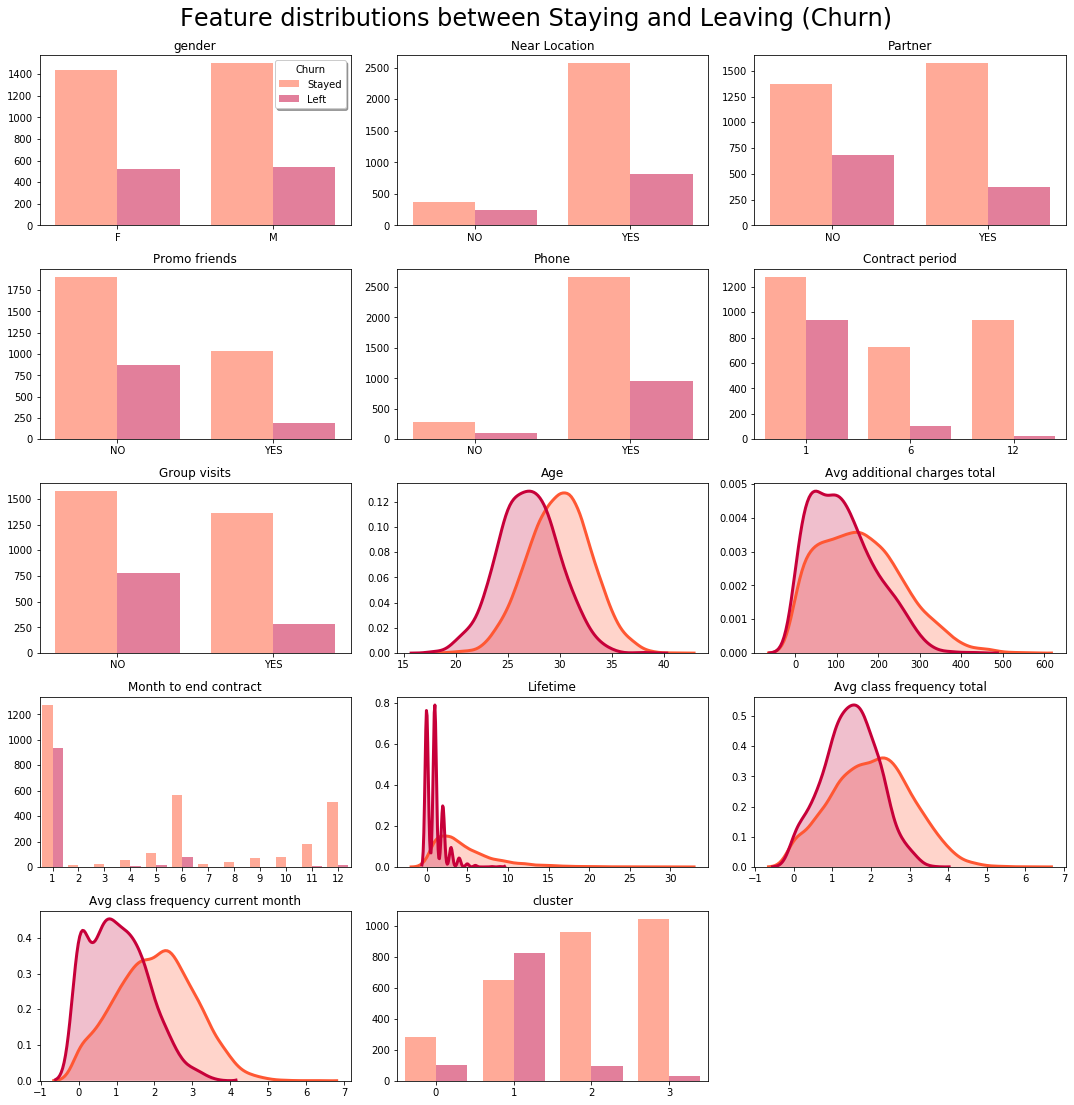

In [33]:
#let's define histograms
colors = ['#FF5733','#C70039','#900C3F','#581845']

def plot_dist(df, feature):
    plt.figure(figsize=(15,15))
    the_grid = GridSpec(5, 3)
    # place in grid for plot
    for i, column in enumerate(df.drop(feature, axis = 1).columns):
        plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
        values = len(df[column].unique())
        features = sorted(df[feature].unique())
    # continuous vs discrete
        if values > 12:    
            for i,x in enumerate(features):
                sns.distplot(df[df[feature] == x][column], hist = False, 
                             kde_kws = {'shade': True, 'linewidth': 3}, color=colors[i])
        else:
            sns.countplot(column, hue=feature, data=gym, palette=colors, alpha=.5, saturation=1)
            plt.gca().get_legend().remove()
     # xticks       
            if values == 2:
                if column == 'gender':
                    plt.xticks(np.arange(values),('F','M'))
     # legend             
                    if feature == 'Churn':
                        legend = ['Stayed','Left']
                    else:
                        legend = features
                    plt.legend(legend, shadow=True, fancybox=True, title=feature, loc='best')
                else:
                    plt.xticks(np.arange(values),('NO','YES'))
            else:
                plt.xticks(np.arange(values),[int(x) for x in sorted(df[column].unique())])
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle('Feature distributions between Staying and Leaving (Churn)', fontsize=24, y=1.02)
    plt.show()
plot_dist(gym,'Churn')

We can confirm the same findings as before, for example, "months to end contract" for those who left is mainly 1 month and some customers are going to leave even when they have 6 months left; the lifetime is mainly situated around 1 month; in addition, those who left went to their class less frequently and spent way less money on additional charges than more loyal customers.

Let's build a correlation matrix and display it.


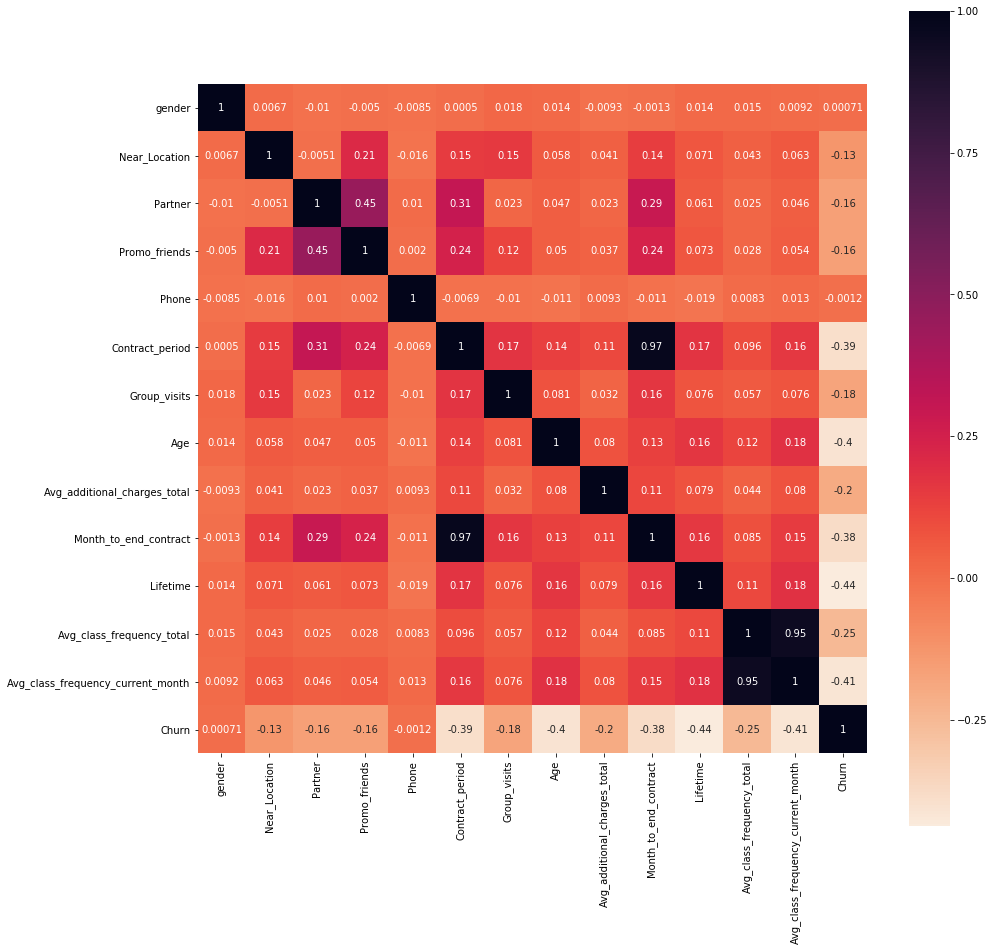

In [9]:
# correlation matrix
corr_m = gym.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square = True, annot = True, cmap="rocket_r")
plt.show()

Regarding the heatmap, the strongest correlations in features we see (pretty obviously) between lifetime frequency for the average class vs for the last month frequency - 95%; and contract length vs time to the end of contract - 97%.

### 2.1 Conclusion <a class="anchor" id="analysis-conc"></a>

In the present step we carried out an exploratory data analysis: 

When looked at the dataset we saw that there was no missing features, then we studied the mean values and standard deviation checking there is no anomalies.

While checking mean feature values in two groups those who stayed and those who left we see that gender is distributed almost equally, that most clients still live near the gym, that among those who left about 35% of customers are employees of a partner companies vs 53% for those who stayed, that most of customers provide their phone number in both groups, that the average contract lenth is almost 6 months for those who stayed vs 1.7 months for those who left, that average customer age is 30 years old for those who stayed vs 27 who those who left, that in average a customer spend 158 on additional charges for those who stayed vs 115 for those who left, that the average lifetime is 4.7 months for those who stayed vs 1 month for those who left and the average class frequency per week during lifetime is 2 for those who stayed vs 1 for those who left.

While checking histograms, we could confirm the same findings as above, for example, fro those who left - months to end contract for those who left is mainly 1 month and a little bit of 6 months; that the lifetime is mainly situated on 1 months, those who left went to their class less frequently and spent way less money on additional charges.

Regarding the heatmap, the strongest correlations in features we see (pretty obviously) between lifetime frequency for the average class vs for the last month frequency - 95%; and contract length vs time to the end of contract - 97%.

## Step 3. Predicting user churn
 <a class="anchor" id="predicting"></a>

Let's build a binary classification model for customers where the target feature is the user's leaving next month.
* Dividing the data into train and validation sets using the train_test_split() function.
* Training the model on the train set with two methods:
    * logistic regression
    * random forest
* Evaluating accuracy, precision, and recall for both models using the validation data. 
The random_state parameter when dividing data and defining the algorithm is 0.


In [10]:
#let's define the function that will output our metrics
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title) 
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tBalanced Accuracy: {:.2f}'.format(balanced_accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [11]:
#let's see data stability 
print('Dataset size:', gym.shape)

Dataset size: (4000, 14)


In [12]:
#let's look at the ratio between the dataset classes
gym['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

As our split is imbalanced, let's add balanced accuracy parameter.

In [13]:
#let's divide the data into features (the X matrix) and a target variable (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

In [14]:
#let's divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# train StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
# transform train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [17]:
# define the algorithm for the logistic regression model
lr_model = LogisticRegression(solver='liblinear', random_state = 0)
# train the model
lr_model.fit(X_train_st, y_train)
# use the trained model to make predictions
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
# print all metrics
lr=print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')
lr

Metrics for logistic regression:
	Accuracy: 0.92
	Balanced Accuracy: 0.89
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.72


In [18]:
# define the algorithm for the new random forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
# train the random forest model
rf_model.fit(X_train_st, y_train)
# use the trained model to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# print all metrics
rf=print_all_metrics(y_test,rf_predictions,rf_probabilities, title = 'Metrics for random forest:')
rf

Metrics for random forest:
	Accuracy: 0.92
	Balanced Accuracy: 0.88
	Precision: 0.84
	Recall: 0.81
	F1: 0.83
	ROC_AUC: 0.97


Let's check more deeply: simpler model - decision tree calssifier and more complex one: gradient boosting.

In [19]:
# define the algorithm for the new decision tree model
tree_model = DecisionTreeClassifier(random_state = 0)
# train the decision tree model
tree_model.fit(X_train_st, y_train)
# use the trained model to make predictions
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:,1]
# print all metrics
tm=print_all_metrics(y_test, tree_predictions, tree_probabilities, title='Metrics for decision tree:')
tm

Metrics for decision tree:
	Accuracy: 0.90
	Balanced Accuracy: 0.87
	Precision: 0.79
	Recall: 0.80
	F1: 0.80
	ROC_AUC: 0.87


In [20]:
# do the same for the gradient boosting model
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:,1]
# print all metrics
gb=print_all_metrics(y_test, gb_predictions,gb_probabilities,title = 'Metrics for gradient boosting:')
gb

Metrics for gradient boosting:
	Accuracy: 0.93
	Balanced Accuracy: 0.90
	Precision: 0.88
	Recall: 0.84
	F1: 0.86
	ROC_AUC: 0.98


We can see the power of the collective model - how much higher ROC_AUC is with random forest compared with logistic regression. This metric conveys maximum information about the quality of a model.

### 3.1 Conclusion <a class="anchor" id="checking-conc"></a>

As a next step our research predicting user churn, we built a binary classification model for customers where the target feature was the user's leaving next month.

We divided the data into train and validation sets using the train_test_split() function 20/80, trained the model on the train set initially with two methods: logistic regression
and random forest; and then with decision tree and gradient boosting. As the split between those who leave and those who stayed was imbalanced we added balanced accuracy parameter.

Evaluating accuracy, precision, and recall for all the models we used the validation data. The random_state 0 parameter was used while dividing data and defining the algorithm.

We can see the power of the collective model - how much higher ROC_AUC is with random forest compared with logistic regression. This metric conveys maximum information about the quality of a model.

## Step 4. User clusters <a class="anchor" id="cluster"></a>

Now let's set aside the column with data on churn and identify object (user) clusters:
* Standardizing the data.
* Using the linkage() function to build a matrix of distances based on the standardized feature matrix and ploting a dendrogram. 
* Training the clustering model with the K-means algorithm and predicting customer clusters. (the number of clusters n=5)
* Looking at the mean feature values for clusters
* Ploting distributions of features for the clusters
* Calculating the churn rate for each cluster (using the groupby() method)

In [21]:
#Standardizing the data, setting aside the column with data on churn
scaler = StandardScaler()
x_sc = scaler.fit_transform(gym.drop(columns = ['Churn']))

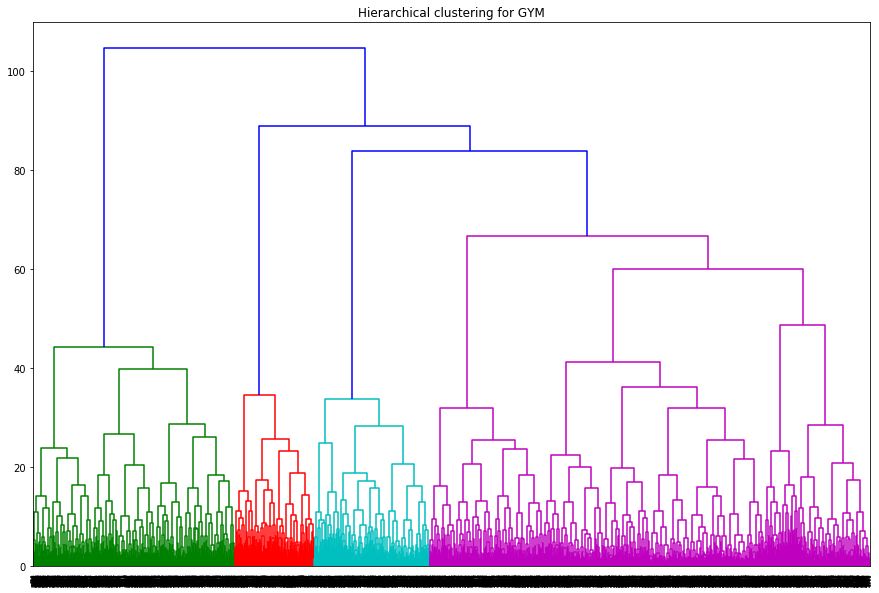

In [23]:
#Using the linkage() function to build a matrix of distances and ploting a dendrogram
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top',show_leaf_counts=True)
plt.title('Hierarchical clustering for GYM')
plt.show() 


Using the resulting graph we can estimate the number of clusters that can singled out - 4.

Now let's train the clustering model with the K-means algorithm and predict customer clusters (the number of clusters will be 4).


In [25]:
#let's define the k_means model with 4 clusters
km = KMeans(n_clusters = 4, random_state=0)

In [26]:
# predict the clusters for observations (the algorithm assigns them a number from 0 to 4)
labels = km.fit_predict(x_sc)

In [27]:
# store cluster labels in the field of our dataset
gym['cluster'] = labels

Now let's look at the mean feature values for clusters and ploting distributions of features for the clusters, then calculating the churn rate for each cluster.

In [28]:
#let's see on the mean feature values for clusters
gym.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590,0.559838
2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132,0.092715
3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685


While checking mean feature values in 4 cluster we see that gender is distributed more or less equally, that most clients still live near the gym, that for the cluster3 (2) about 34% of customers are employees of a partner companies vs 78% for cluster4 (3 in the table), that in 3 cluster customers provide their phone number vs cluster1 (0) where they don't, that the min average contract lenth is almost 2 months for cluster2 (1) vs 10.7 months for cluster4 (3), that average customer age is between 28 and 30 years old for all clusters, that minimum in average a customer spend 130 on additional charges for those cluster2 (1) vs 161 for cluster4 (3), that the min average lifetime is 2.2 months for cluster3 (2) vs 9.8 months for cluster4 (3) and the average class frequency per week during lifetime is 1.2 for cluster2 (1) vs 2.7 for cluster3 (2).



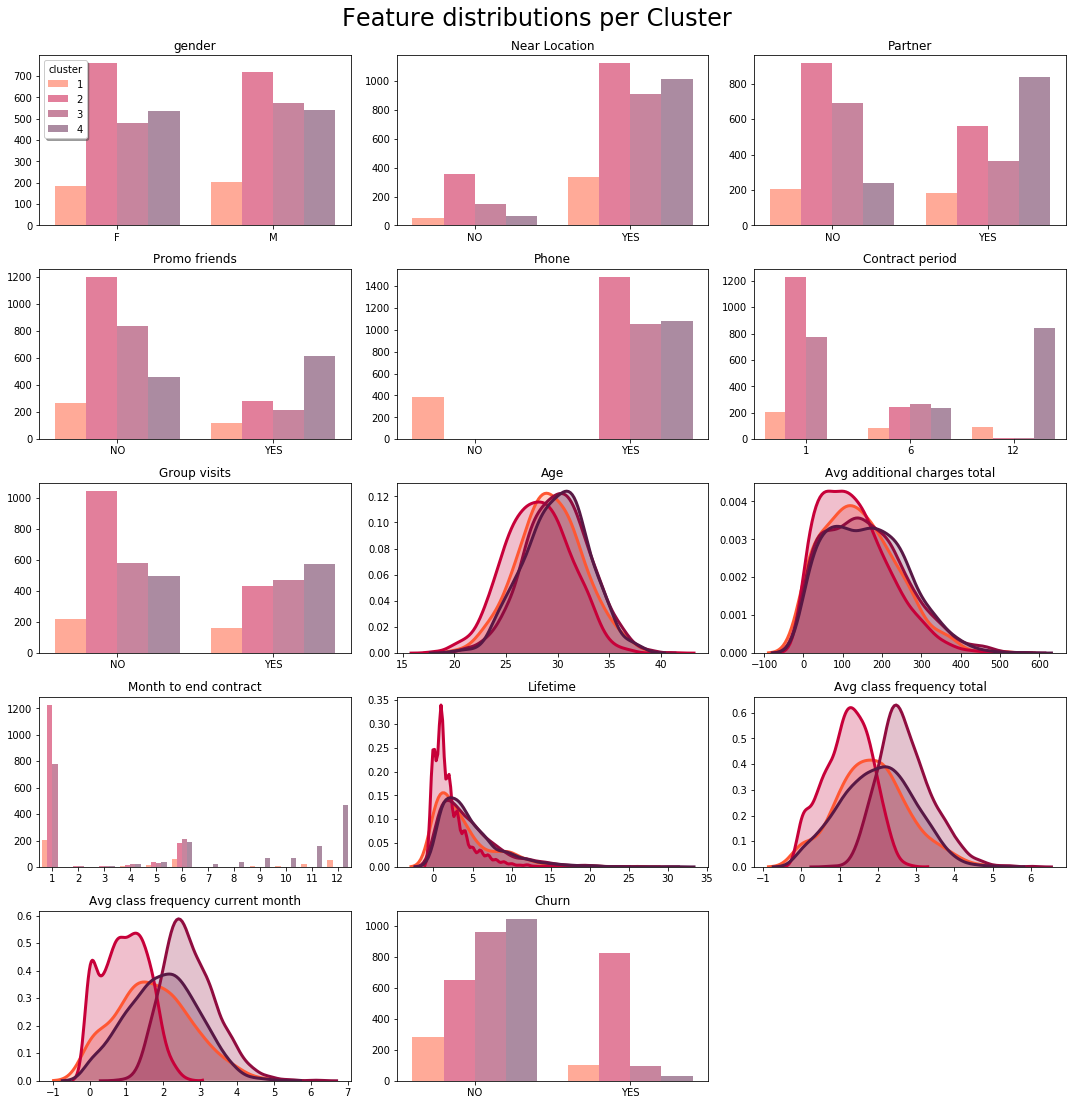

In [32]:
#let's define plot distribution of features for each claster
colors = ['#FF5733','#C70039','#900C3F','#581845']

def plot_dist(df, feature):
    plt.figure(figsize=(15,15))
    the_grid = GridSpec(5, 3)
    # place in grid for plot
    for i, column in enumerate(df.drop(feature, axis = 1).columns):
        plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
        values = len(df[column].unique())
        features = sorted(df[feature].unique())
    # continuous vs discrete
        if values > 12:    
            for i,x in enumerate(features):
                sns.distplot(df[df[feature] == x][column], hist = False, 
                             kde_kws = {'shade': True, 'linewidth': 3}, color=colors[i])
        else:
            sns.countplot(column, hue=feature, data=gym, palette=colors, alpha=.5, saturation=1)
            plt.gca().get_legend().remove()
     # xticks       
            if values == 2:
                if column == 'gender':
                    plt.xticks(np.arange(values),('F','M'))
     # legend             
                    if feature == 'cluster':
                        legend = ['1','2','3','4']
                    else:
                        legend = features
                    plt.legend(legend, shadow=True, fancybox=True, title=feature, loc='best')
                else:
                    plt.xticks(np.arange(values),('NO','YES'))
            else:
                plt.xticks(np.arange(values),[int(x) for x in sorted(df[column].unique())])
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle('Feature distributions per Cluster', fontsize=24, y=1.02)
    plt.show()
plot_dist(gym,'cluster')

We can see pretty much the same picture while ploting distributions of features for the clusters. 

Now let's calculate the churn rate for each cluster and see whether they differ in terms of churn rate - which clusters are prone to leaving, and which are loyal.


In [46]:
#let's calculate the churn rate for each cluster
churn=gym.groupby('cluster')['Churn'].mean()
churn

cluster
0    0.266839
1    0.559838
2    0.092715
3    0.029685
Name: Churn, dtype: float64

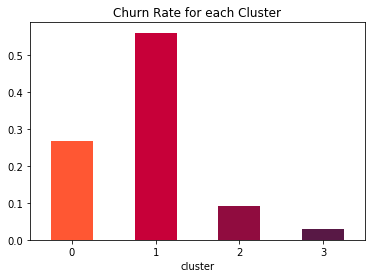

In [61]:
#let's see it in the graph
ax = churn.plot.bar(x='cluster', y='Churn', rot=0, color=['#FF5733','#C70039','#900C3F','#581845'])
plt.title('Churn Rate for each Cluster')
plt.show()

We can see that cluster4 (3) is the most loyal and that the cluster2 (1) is the one where are customers are prone to leave.

### 4.7 Conclusion<a class="anchor" id="funnel-conc"></a>

In thos step we created user clusters and checked data on churn. First, we standardizing the data, then using the linkage() function we built a matrix of distances based on the standardized feature matrix and plot a dendrogram. Using the resulting graph we estimated the number of clusters that can singled out - 4.

Then we trained the clustering model with the K-means algorithm and predict customer clusters (the number of clusters was 4). After predicting the clusters for observations (the algorithm assigned them a number from 0 to 3), we stored cluster labels in the field of our dataset - column "cluster".

Then while checking mean feature values in 4 cluster we saw following results: 

that gender is distributed more or less equally, that most clients still live near the gym, that for the cluster3 (2) about 34% of customers are employees of a partner companies vs 78% for cluster4 (3 in the table), that in 3 cluster customers provide their phone number vs cluster1 (0) where they don't, that the min average contract lenth is almost 2 months for cluster2 (1) vs 10.7 months for cluster4 (3), that average customer age is between 28 and 30 years old for all clusters, that minimum in average a customer spend 130 on additional charges for those cluster2 (1) vs 161 for cluster4 (3), that the min average lifetime is 2.2 months for cluster3 (2) vs 9.8 months for cluster4 (3) and the average class frequency per week during lifetime is 1.2 for cluster2 (1) vs 2.7 for cluster3 (2).
We saw pretty much the same picture pretty well while ploting distributions of features for the clusters. 

Then, we calculated the churn rate for each cluster and found out that cluster4 (3) is the most loyal and that the cluster2 (1) is the one where are customers are prone to leave.

Thus it is suggested to take care of this group of customers - cluster4, in order to prevent them from leaving.

## Step 5. Results of the experiment
 <a class="anchor" id="results"></a>

Given research investigated customer behaviour for the Model Fitness, the gym chain that is developing a customer interaction strategy based on analytical data.

First, we found that those who are going to leave normally have 1 month till the end of their contract (but some of them have event 6 months); that the lifetime for them is mainly 1 month and that those who left went to their class less frequently and spent way less money on additional charges.

Based on our models, we were able to define a group of customers who are more likely to leave - it is recommended to use customer retention strategy for this group-cluster2 in order to make them stay.

As a general recommendation we also suggest to take care of the most loyal customers in group-cluster4 in order to make them feel even more valuable, so they can bring easily more money to the company.